# Warp factory for Python

This code represents the outcome of an exploration I conducted on how to compute the stress-energy tensor for a given spacetime metric. My goal is to replicate the functionality of the "Warp Factory" code described in the paper arXiv:2404.03095.

In contrast to the approach in that study, I aim to leverage the full capabilities of SymPy and EinsteinPy to derive analytical expressions for various quantities of interest, avoiding reliance on numerical approximations whenever possible. This symbolic approach allows for greater flexibility and precision in theoretical investigations.

I may introduce additional constraints on the physicality of the energy-momentum tensor, particularly when negative energy arises, as discussed in arXiv
/9702026.

At this stage, the code is more of a collection of potential applications without a clear overarching theme or direction.

### import relevant library

In [1]:
import sympy as sp
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor, RicciTensor, RicciScalar, EinsteinTensor
from sympy import init_printing

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Numerical evaluation from sympy

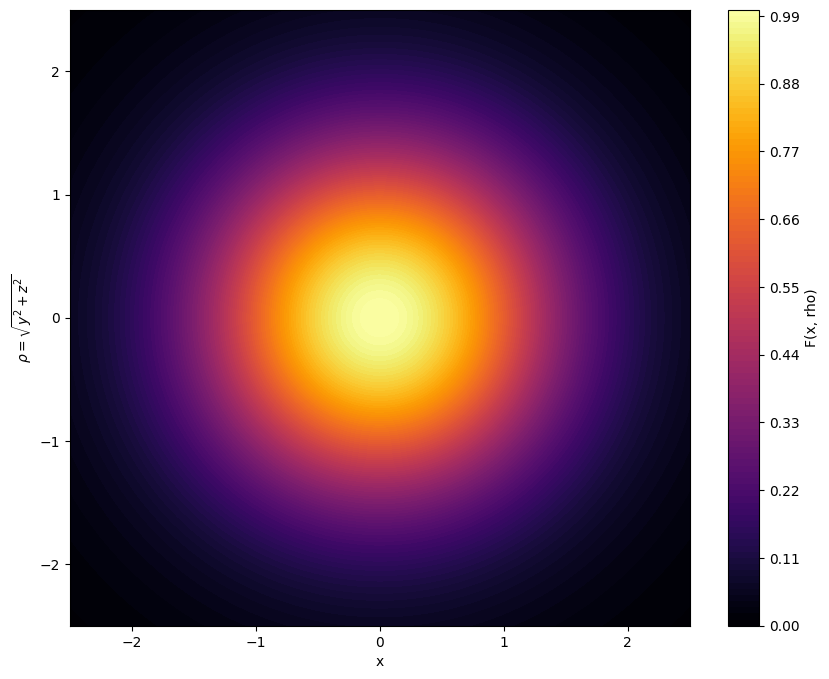

In [2]:
# Define the symbols
x, y, z, t, sigma, v, R = sp.symbols('x y z t sigma v R')

# Define rho and R
rho = sp.sqrt(y**2 + z**2)
r_s = sp.sqrt((x - v * t)**2 + rho**2)

# Define the function f
f = (sp.tanh(sigma * (r_s+R)) - sp.tanh(sigma * (r_s-R))) / (2*sp.tanh(sigma * R))


# Convert the SymPy expression to a numerical function
f_numeric = sp.lambdify((x, y, z, t, sigma, v, R), f, 'numpy')

# Define the grid
a=2.5
x_values = np.linspace(-a, a, 1000)
y_values = np.linspace(-a, a, 1000)
z_value = 0
sigma_value = 1  # Example value for sigma
v_value = 1      # Example value for v
t_value=0
R_value=1

# Create a meshgrid for x and rho (since rho = sqrt(y^2 + z^2), we can use y and z directly)
X, Y = np.meshgrid(x_values, y_values)

# Evaluate the function over the grid
F = f_numeric(X, Y, z_value ,t_value, sigma_value, v_value, R_value)




# Assuming X, Y, and F are already defined arrays

plt.figure(figsize=(10, 8))

# Create the heatmap with more levels
levels = 100  # Increase this value for smoother gradients
plt.contourf(X, Y, F, levels=levels, cmap='inferno')

# Add labels and a colorbar
plt.colorbar(label='F(x, rho)')
plt.xlabel('x')
plt.ylabel(r'$\rho = \sqrt{y^2 + z^2}$')

# Show the plot
plt.show()

Simplified Expression: 3*x + y


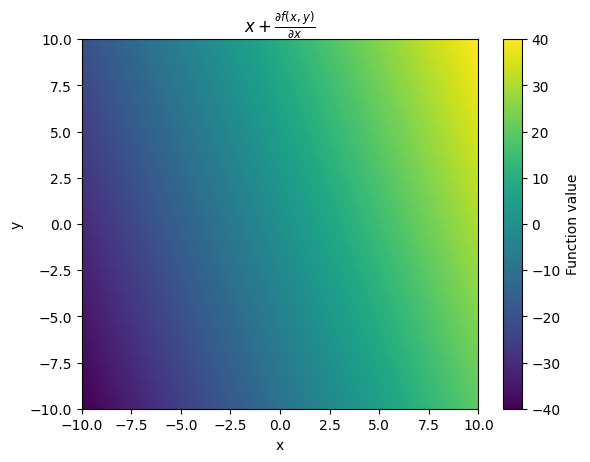

In [3]:
# Step 1: Define the symbolic variables and function f(x, y)
x, y = sp.symbols('x y')
f = x**2 + x*y + y

# Step 2: Compute the partial derivative of f with respect to x
df_dx = sp.diff(f, x)

# Step 3: Define the expression x + d/dx f(x, y)
expression = x + df_dx

# Step 4: Simplify the expression
simplified_expr = sp.simplify(expression)
print(f"Simplified Expression: {simplified_expr}")

# Step 5: Convert the SymPy expression into a function that can be evaluated numerically
f_numeric = sp.lambdify((x, y), simplified_expr, "numpy")

# Step 6: Create a grid of x and y values to evaluate the function
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Step 7: Evaluate the function on the grid
Z = f_numeric(X, Y)

# Step 8: Plot the result using imshow
plt.imshow(Z, extent=[x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Function value')
plt.title(r"$x + \frac{\partial f(x, y)}{\partial x}$")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


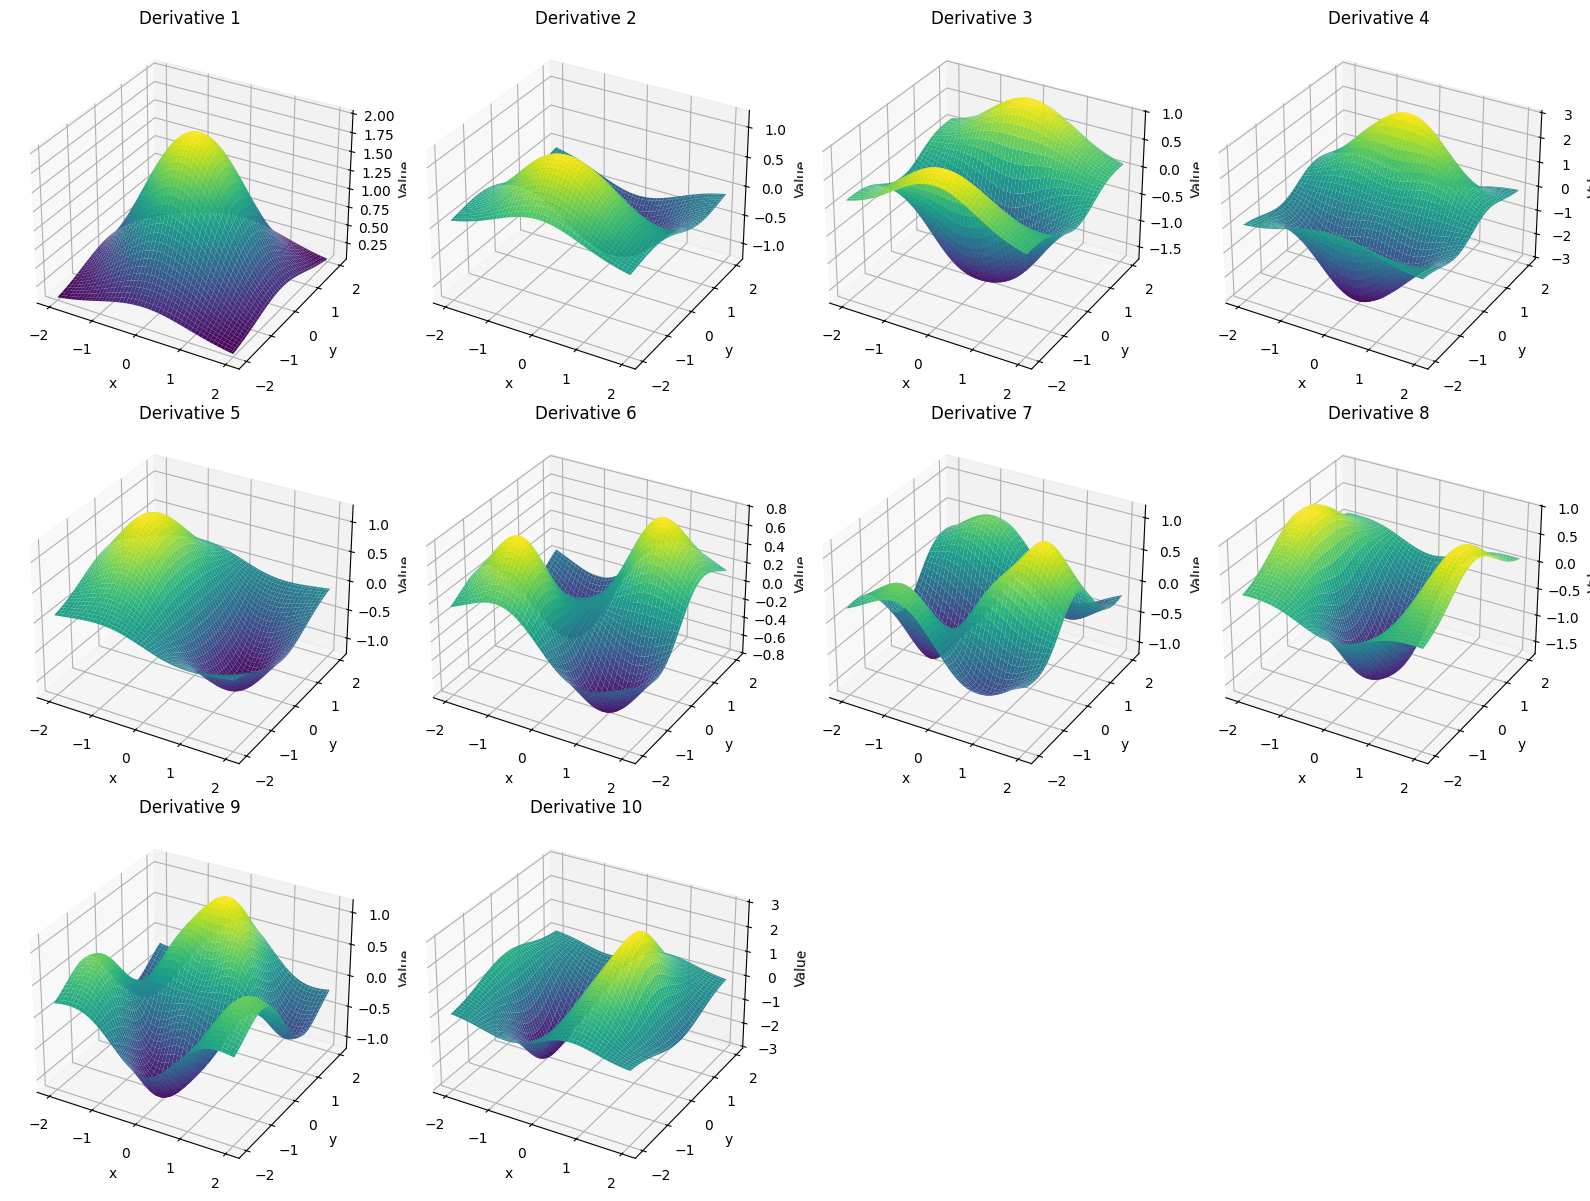

In [4]:
# Define the symbols
x, y = sp.symbols('x y')

# Use a placeholder for f(x, y)
f_placeholder = sp.Function('f')(x, y)

# Compute all partial derivatives up to the third order symbolically
derivatives = []
for i in range(4):  # up to 3rd order means 0 to 3 derivatives
    for j in range(4):
        if i + j <= 3:  # Total order should be less than or equal to 3
            derivative = sp.diff(f_placeholder, x, i, y, j)  # ∂^(i+j)f / ∂x^i ∂y^j
            derivatives.append(derivative)

# Define the actual function f(x, y)
r = sp.sqrt(x**2 + y**2)
f_actual = (sp.tanh(r + 1) - sp.tanh(r - 1)) / sp.tanh(1)

# Substitute the actual function into each derivative
derivatives_evaluated = [derivative.subs(f_placeholder, f_actual) for derivative in derivatives]

# Convert each derivative to its simplified expression form to avoid symbolic derivatives
derivatives_explicit = [sp.simplify(sp.expand(deriv)) for deriv in derivatives_evaluated]

# Convert the explicit derivatives to numerical functions using lambdify
numerical_functions = [sp.lambdify((x, y), deriv) for deriv in derivatives_explicit]

# Set up the range for x and y
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# Plot each derivative
fig = plt.figure(figsize=(16, 12))
for idx, func in enumerate(numerical_functions):
    # Evaluate the function over the grid
    z_vals = func(x_grid, y_grid)
    
    # Create a 3D subplot for each derivative
    ax = fig.add_subplot(3, 4, idx + 1, projection='3d')
    ax.plot_surface(x_grid, y_grid, z_vals, cmap='viridis', edgecolor='none')
    ax.set_title(f'Derivative {idx + 1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Value')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [5]:
# Define the symbol
x = sp.symbols('x')

# Define the piecewise function
f_piecewise = sp.Piecewise(
    (x**2, x < 0),           # x^2 for x < 0
    (sp.sin(x), (x >= 0) & (x <= sp.pi)),  # sin(x) for 0 <= x <= pi
    (sp.exp(-x), x > sp.pi)  # e^(-x) for x > pi
)

# Display the piecewise function
sp.pretty_print(f_piecewise)

⎧   2             
⎪  x     for x < 0
⎪                 
⎨sin(x)  for x ≤ π
⎪                 
⎪  -x             
⎩ ℯ      otherwise


## Tetrahed computation

Here I implement the tetrahed solution of arXiv:2404.03095 to see if there is no error and to be sure that the $e_{\mu}^0$ is indeed orthogonal to constant time hypersurface by comparing it to the expression in the 3+1 formalism. 

In [6]:
# Create symbols g0 to g10
g = sp.symbols('g1:11')
e_ = sp.symbols('e1:11')
# Create a 4x4 symbolic matrix (filling from g0 to g10)
G = sp.Matrix([
    [g[0], g[1], g[2], g[3]],
    [g[1], g[4], g[5], g[6]],
    [g[2], g[5], g[7], g[8]],
    [g[3], g[6], g[8], g[9]]
])

E = sp.Matrix([
    [e_[0],  0   ,  0   ,  0   ],
    [e_[1], e_[4],  0   ,  0   ],
    [e_[2], e_[5], e_[7],  0   ],
    [e_[3], e_[6], e_[8], e_[9]]
])

In [7]:
E

Matrix([
[e1,  0,  0,   0],
[e2, e5,  0,   0],
[e3, e6, e8,   0],
[e4, e7, e9, e10]])

In [8]:
G

Matrix([
[g1, g2, g3,  g4],
[g2, g5, g6,  g7],
[g3, g6, g8,  g9],
[g4, g7, g9, g10]])

In [9]:
# Define the scalars A, B, C, and D
# Define the scalars with adjusted indices
A = g[9]

B = -g[8]**2 + g[7] * g[9]

C = (-g[4] * g[8]**2 - g[7] * g[6]**2 - g[9] * g[5]**2
     + 2 * g[5] * g[6] * g[8] + g[4] * g[7] * g[9])


D = (g[1]**2 * g[8]**2 + g[2]**2 * g[6]**2 + g[3]**2 * g[5]**2
     - g[7] * g[9] * g[1]**2 - g[4] * g[9] * g[2]**2 - g[4] * g[7] * g[3]**2
     - g[0] * g[9] * g[5]**2 - g[0] * g[7] * g[6]**2 - g[0] * g[4] * g[8]**2
     + 2 * g[9] * g[1] * g[2] * g[5] + 2 * g[7] * g[1] * g[3] * g[6]
     + 2 * g[4] * g[2] * g[3] * g[8] + 2 * g[0] * g[5] * g[6] * g[8] 
     - 2 * g[1] * g[2] * g[6] * g[8] - 2 * g[1] * g[3] * g[5] * g[8]
     - 2 * g[2] * g[3] * g[5] * g[6] + g[0] * g[4] * g[7] * g[9])


#note : (A,B,C,D) = (-,+,+,+)

In [10]:
display(A)
display(B)
display(C)
display(D)

g10

g10*g8 - g9**2

g10*g5*g8 - g10*g6**2 - g5*g9**2 + 2*g6*g7*g9 - g7**2*g8

g1*g10*g5*g8 - g1*g10*g6**2 - g1*g5*g9**2 + 2*g1*g6*g7*g9 - g1*g7**2*g8 - g10*g2**2*g8 + 2*g10*g2*g3*g6 - g10*g3**2*g5 + g2**2*g9**2 - 2*g2*g3*g7*g9 - 2*g2*g4*g6*g9 + 2*g2*g4*g7*g8 + g3**2*g7**2 + 2*g3*g4*g5*g9 - 2*g3*g4*g6*g7 - g4**2*g5*g8 + g4**2*g6**2

In [11]:
E_0 =(1 / sp.sqrt(-C * D)) * sp.Matrix([
    C,   #here, first error of the paper, it's a +C not -C             
     
     g[1] * g[8]**2 + g[2] * g[5] * g[9] + g[3] * g[6] * g[7] - g[1] * g[7] * g[9] - g[2] * g[6] * g[8] - g[3] * g[5] * g[8],

    g[2] * g[6]**2 + g[1] * g[5] * g[9] + g[3] * g[4] * g[8] - g[1] * g[6] * g[8] - g[2] * g[4] * g[9] - g[3] * g[5] * g[6],

    g[3] * g[5]**2 + g[1] * g[6] * g[7] + g[2] * g[4] * g[8] - g[1] * g[5] * g[8] - g[2] * g[5] * g[6] - g[3] * g[4] * g[7]

])



E_1=(1 / sp.sqrt(B*C)) * sp.Matrix([
    0,                
     
    B,

    #g[5] * g[9] - g[6] * g[8], second error in the paper
    -g[5] * g[9] + g[6] * g[8],

    g[5] * g[8] - g[6] * g[7]

])

E_2=(1 / sp.sqrt(A*B)) * sp.Matrix([
    0,                
     
    0,

    A,

    -g[8] 

])

E_3=(1 / sp.sqrt(A)) * sp.Matrix([
    0,                
     
    0,

    0,

    1

])

E_solution=matrix = sp.Matrix.hstack(E_0, E_1, E_2, E_3)

In [12]:
N=E_solution.T*G*E_solution
display(sp.simplify(N))
#we indeed retrieve the minkowskian metric

Matrix([
[-1, 0, 0, 0],
[ 0, 1, 0, 0],
[ 0, 0, 1, 0],
[ 0, 0, 0, 1]])

### Check the time hypersurface orthogonality

Here we build the metric of the 3+1 formalism. compare $e_{\mu}^0$ and the orthogonal vector of the 3+1 formalism and see if there are the same. It turns out there are the same but sympy don't recognise that there is a simplification possibility so extra step are required to prove that both vector are equal. 

In [13]:
# Define the new variables
alpha, beta1, beta2, beta3 = sp.symbols('alpha beta1 beta2 beta3')
gamma11, gamma12, gamma13 = sp.symbols('gamma11 gamma12 gamma13')
gamma22, gamma23 = sp.symbols('gamma22 gamma23')
gamma33 = sp.symbols('gamma33')

Gamma=sp.Matrix([
    [gamma11, gamma12, gamma13],
    [gamma12, gamma22, gamma23],
    [gamma13, gamma23, gamma33]
])

beta_vector = sp.Matrix([beta1, beta2, beta3])


# Compute the covariant components beta_i
beta_covariant = sp.simplify(Gamma.inv()) * beta_vector

# Compute beta^i * beta_i
beta_dot_beta = sp.simplify(beta_vector.dot(beta_covariant))

In [14]:
# Define substitutions for the new variables
substitutions = {
    g[0]: -alpha**2 + beta_dot_beta,
    g[1]: beta1,
    g[2]: beta2,
    g[3]: beta3,
    g[4]: gamma11,
    g[5]: gamma12,
    g[6]: gamma13,
    g[7]: gamma22,
    g[8]: gamma23,
    g[9]: gamma33   
}

# Update the original matrix G
G_new = G.subs(substitutions)

# Display the updated matrix
display(G_new)

Matrix([
[-alpha**2 + (-beta1*(beta1*(gamma22*gamma33 - gamma23**2) - beta2*(gamma12*gamma33 - gamma13*gamma23) + beta3*(gamma12*gamma23 - gamma13*gamma22)) + beta2*(beta1*(gamma12*gamma33 - gamma13*gamma23) - beta2*(gamma11*gamma33 - gamma13**2) + beta3*(gamma11*gamma23 - gamma12*gamma13)) - beta3*(beta1*(gamma12*gamma23 - gamma13*gamma22) - beta2*(gamma11*gamma23 - gamma12*gamma13) + beta3*(gamma11*gamma22 - gamma12**2)))/(-gamma11*gamma22*gamma33 + gamma11*gamma23**2 + gamma12**2*gamma33 - 2*gamma12*gamma13*gamma23 + gamma13**2*gamma22),   beta1,   beta2,   beta3],
[                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [15]:
E_0_to_compare =1/alpha*sp.Matrix([
    1,                
     
    -beta_covariant[0],

    -beta_covariant[1],

    -beta_covariant[2]

])

display(sp.simplify(E_0_to_compare.expand()))

Matrix([
[                                                                                                                                                                                                                                                                  1/alpha],
[ (beta1*gamma22*gamma33 - beta1*gamma23**2 - beta2*gamma12*gamma33 + beta2*gamma13*gamma23 + beta3*gamma12*gamma23 - beta3*gamma13*gamma22)/(alpha*(-gamma11*gamma22*gamma33 + gamma11*gamma23**2 + gamma12**2*gamma33 - 2*gamma12*gamma13*gamma23 + gamma13**2*gamma22))],
[(-beta1*gamma12*gamma33 + beta1*gamma13*gamma23 + beta2*gamma11*gamma33 - beta2*gamma13**2 - beta3*gamma11*gamma23 + beta3*gamma12*gamma13)/(alpha*(-gamma11*gamma22*gamma33 + gamma11*gamma23**2 + gamma12**2*gamma33 - 2*gamma12*gamma13*gamma23 + gamma13**2*gamma22))],
[ (beta1*gamma12*gamma23 - beta1*gamma13*gamma22 - beta2*gamma11*gamma23 + beta2*gamma12*gamma13 + beta3*gamma11*gamma22 - beta3*gamma12**2)/(alpha*(-gamma11*gamma22*gamma33 + gamma11*

In [16]:
display(sp.simplify(beta_covariant.expand()))

Matrix([
[(-beta1*gamma22*gamma33 + beta1*gamma23**2 + beta2*gamma12*gamma33 - beta2*gamma13*gamma23 - beta3*gamma12*gamma23 + beta3*gamma13*gamma22)/(-gamma11*gamma22*gamma33 + gamma11*gamma23**2 + gamma12**2*gamma33 - 2*gamma12*gamma13*gamma23 + gamma13**2*gamma22)],
[ (beta1*gamma12*gamma33 - beta1*gamma13*gamma23 - beta2*gamma11*gamma33 + beta2*gamma13**2 + beta3*gamma11*gamma23 - beta3*gamma12*gamma13)/(-gamma11*gamma22*gamma33 + gamma11*gamma23**2 + gamma12**2*gamma33 - 2*gamma12*gamma13*gamma23 + gamma13**2*gamma22)],
[(-beta1*gamma12*gamma23 + beta1*gamma13*gamma22 + beta2*gamma11*gamma23 - beta2*gamma12*gamma13 - beta3*gamma11*gamma22 + beta3*gamma12**2)/(-gamma11*gamma22*gamma33 + gamma11*gamma23**2 + gamma12**2*gamma33 - 2*gamma12*gamma13*gamma23 + gamma13**2*gamma22)]])

In [17]:
E_0_ortho=E_0.subs(substitutions)

display(sp.simplify(sp.factor(E_0_ortho)))

Matrix([
[                       (gamma11*gamma22*gamma33 - gamma11*gamma23**2 - gamma12**2*gamma33 + 2*gamma12*gamma13*gamma23 - gamma13**2*gamma22)/sqrt(alpha**2*(gamma11**2*gamma22**2*gamma33**2 - 2*gamma11**2*gamma22*gamma23**2*gamma33 + gamma11**2*gamma23**4 - 2*gamma11*gamma12**2*gamma22*gamma33**2 + 2*gamma11*gamma12**2*gamma23**2*gamma33 + 4*gamma11*gamma12*gamma13*gamma22*gamma23*gamma33 - 4*gamma11*gamma12*gamma13*gamma23**3 - 2*gamma11*gamma13**2*gamma22**2*gamma33 + 2*gamma11*gamma13**2*gamma22*gamma23**2 + gamma12**4*gamma33**2 - 4*gamma12**3*gamma13*gamma23*gamma33 + 2*gamma12**2*gamma13**2*gamma22*gamma33 + 4*gamma12**2*gamma13**2*gamma23**2 - 4*gamma12*gamma13**3*gamma22*gamma23 + gamma13**4*gamma22**2))],
[(-beta1*gamma22*gamma33 + beta1*gamma23**2 + beta2*gamma12*gamma33 - beta2*gamma13*gamma23 - beta3*gamma12*gamma23 + beta3*gamma13*gamma22)/sqrt(alpha**2*(gamma11**2*gamma22**2*gamma33**2 - 2*gamma11**2*gamma22*gamma23**2*gamma33 + gamma11**2*gamma23**4 - 2*gamma11*g

In [18]:
denominator=(gamma11*gamma22*gamma33-gamma11*gamma23**2-gamma12**2*gamma33+2*gamma12*gamma13*gamma23-gamma13**2*gamma22)**2

In [19]:
display(denominator)

(gamma11*gamma22*gamma33 - gamma11*gamma23**2 - gamma12**2*gamma33 + 2*gamma12*gamma13*gamma23 - gamma13**2*gamma22)**2

In [20]:
display(denominator.expand())

gamma11**2*gamma22**2*gamma33**2 - 2*gamma11**2*gamma22*gamma23**2*gamma33 + gamma11**2*gamma23**4 - 2*gamma11*gamma12**2*gamma22*gamma33**2 + 2*gamma11*gamma12**2*gamma23**2*gamma33 + 4*gamma11*gamma12*gamma13*gamma22*gamma23*gamma33 - 4*gamma11*gamma12*gamma13*gamma23**3 - 2*gamma11*gamma13**2*gamma22**2*gamma33 + 2*gamma11*gamma13**2*gamma22*gamma23**2 + gamma12**4*gamma33**2 - 4*gamma12**3*gamma13*gamma23*gamma33 + 2*gamma12**2*gamma13**2*gamma22*gamma33 + 4*gamma12**2*gamma13**2*gamma23**2 - 4*gamma12*gamma13**3*gamma22*gamma23 + gamma13**4*gamma22**2

In [21]:
display(sp.simplify(G_new.inv()*sp.Matrix([-alpha,0,0,0])))

Matrix([
[                                                                                                                                                                                                                                                                 1/alpha],
[(beta1*gamma22*gamma33 - beta1*gamma23**2 - beta2*gamma12*gamma33 + beta2*gamma13*gamma23 + beta3*gamma12*gamma23 - beta3*gamma13*gamma22)/(alpha*(-gamma11*gamma22*gamma33 + gamma11*gamma23**2 + gamma12**2*gamma33 - 2*gamma12*gamma13*gamma23 + gamma13**2*gamma22))],
[ (beta1*gamma12*gamma33 - beta1*gamma13*gamma23 - beta2*gamma11*gamma33 + beta2*gamma13**2 + beta3*gamma11*gamma23 - beta3*gamma12*gamma13)/(alpha*(gamma11*gamma22*gamma33 - gamma11*gamma23**2 - gamma12**2*gamma33 + 2*gamma12*gamma13*gamma23 - gamma13**2*gamma22))],
[(beta1*gamma12*gamma23 - beta1*gamma13*gamma22 - beta2*gamma11*gamma23 + beta2*gamma12*gamma13 + beta3*gamma11*gamma22 - beta3*gamma12**2)/(alpha*(-gamma11*gamma22*gamma33 + gamma11*gamm

### Inverse 3+1 formalism change 

In [22]:
# Define the 3+1 variables
alpha, beta1, beta2, beta3 = sp.symbols('alpha beta1 beta2 beta3')
gamma11, gamma12, gamma13 = sp.symbols('gamma11 gamma12 gamma13')
gamma22, gamma23 = sp.symbols('gamma22 gamma23')
gamma33 = sp.symbols('gamma33')

Gamma=sp.Matrix([
    [gamma11, gamma12, gamma13],
    [gamma12, gamma22, gamma23],
    [gamma13, gamma23, gamma33]
])

beta_vector = sp.Matrix([beta1, beta2, beta3])


# Compute the covariant components beta_i
beta_covariant = sp.simplify(Gamma.inv()) * beta_vector

# Compute beta^i * beta_i
beta_dot_beta = sp.simplify(beta_vector.dot(beta_covariant))




substitution_step1= {
    beta1:g[1],
    beta2:g[2],
    beta3:g[3],
    gamma11:g[4],
    gamma12:g[5],
    gamma13:g[6],
    gamma22:g[7],
    gamma23:g[8],
    gamma33:g[9]
}

substitution_step2= {
    alpha:sp.sqrt(-g[0]+beta_dot_beta.subs(substitution_step1))
}

substitution_step3= substitution_step1 | substitution_step2


metric_template_test = sp.Matrix([
    [-alpha**2+beta_dot_beta, beta1, beta2, beta3],
    [beta1, gamma11, gamma12, gamma13],
    [beta2, gamma12, gamma22, gamma23],
    [beta3, gamma13, gamma23, gamma33]
])
display(metric_template_test)
display(sp.simplify(metric_template_test.subs(substitution_step3)))
#compute Kij and its scalar

Matrix([
[-alpha**2 + (-beta1*(beta1*(gamma22*gamma33 - gamma23**2) - beta2*(gamma12*gamma33 - gamma13*gamma23) + beta3*(gamma12*gamma23 - gamma13*gamma22)) + beta2*(beta1*(gamma12*gamma33 - gamma13*gamma23) - beta2*(gamma11*gamma33 - gamma13**2) + beta3*(gamma11*gamma23 - gamma12*gamma13)) - beta3*(beta1*(gamma12*gamma23 - gamma13*gamma22) - beta2*(gamma11*gamma23 - gamma12*gamma13) + beta3*(gamma11*gamma22 - gamma12**2)))/(-gamma11*gamma22*gamma33 + gamma11*gamma23**2 + gamma12**2*gamma33 - 2*gamma12*gamma13*gamma23 + gamma13**2*gamma22),   beta1,   beta2,   beta3],
[                                                                                                                                                                                                                                                                                                                                                                                                                                        

Matrix([
[g1, g2, g3,  g4],
[g2, g5, g6,  g7],
[g3, g6, g8,  g9],
[g4, g7, g9, g10]])

### Other tests

In [23]:
substitutions2 = {
    g[0]: -alpha**2 + beta1**2+beta2**2+beta3**2,
    g[1]: beta1,
    g[2]: beta2,
    g[3]: beta3,
    g[4]: 1,
    g[5]: 0,
    g[6]: 0,
    g[7]: 1,
    g[8]: 0,
    g[9]: 1   
}

In [24]:
E_0_ortho=E_0.subs(substitutions2)

display(sp.simplify(sp.factor(E_0_ortho)))

Matrix([
[     1/sqrt(alpha**2)],
[-beta1/sqrt(alpha**2)],
[-beta2/sqrt(alpha**2)],
[-beta3/sqrt(alpha**2)]])

In [25]:
# Define substitutions for the new variables
substitutions3 = {
    g[0]: -alpha**2 + gamma11**(-1)*beta1**2+gamma22**(-1)*beta2**2+gamma33**(-1)*beta3**2,
    g[1]: beta1,
    g[2]: beta2,
    g[3]: beta3,
    g[4]: gamma11,
    g[5]: 0,
    g[6]: 0,
    g[7]: gamma22,
    g[8]: 0,
    g[9]: gamma33   
}



In [26]:
E_0_ortho=E_0.subs(substitutions3)

display(sp.simplify(sp.factor(E_0_ortho)))

Matrix([
[gamma11*gamma22*gamma33/sqrt(alpha**2*gamma11**2*gamma22**2*gamma33**2)],
[ -beta1*gamma22*gamma33/sqrt(alpha**2*gamma11**2*gamma22**2*gamma33**2)],
[ -beta2*gamma11*gamma33/sqrt(alpha**2*gamma11**2*gamma22**2*gamma33**2)],
[ -beta3*gamma11*gamma22/sqrt(alpha**2*gamma11**2*gamma22**2*gamma33**2)]])

In [27]:
G_inv=G.inv()

In [28]:
sp.simplify(G_inv)

Matrix([
[         (-g10*g5*g8 + g10*g6**2 + g5*g9**2 - 2*g6*g7*g9 + g7**2*g8)/(-g1*g10*g5*g8 + g1*g10*g6**2 + g1*g5*g9**2 - 2*g1*g6*g7*g9 + g1*g7**2*g8 + g10*g2**2*g8 - 2*g10*g2*g3*g6 + g10*g3**2*g5 - g2**2*g9**2 + 2*g2*g3*g7*g9 + 2*g2*g4*g6*g9 - 2*g2*g4*g7*g8 - g3**2*g7**2 - 2*g3*g4*g5*g9 + 2*g3*g4*g6*g7 + g4**2*g5*g8 - g4**2*g6**2), (g10*g2*g8 - g10*g3*g6 - g2*g9**2 + g3*g7*g9 + g4*g6*g9 - g4*g7*g8)/(-g1*g10*g5*g8 + g1*g10*g6**2 + g1*g5*g9**2 - 2*g1*g6*g7*g9 + g1*g7**2*g8 + g10*g2**2*g8 - 2*g10*g2*g3*g6 + g10*g3**2*g5 - g2**2*g9**2 + 2*g2*g3*g7*g9 + 2*g2*g4*g6*g9 - 2*g2*g4*g7*g8 - g3**2*g7**2 - 2*g3*g4*g5*g9 + 2*g3*g4*g6*g7 + g4**2*g5*g8 - g4**2*g6**2), (-g10*g2*g6 + g10*g3*g5 + g2*g7*g9 - g3*g7**2 - g4*g5*g9 + g4*g6*g7)/(-g1*g10*g5*g8 + g1*g10*g6**2 + g1*g5*g9**2 - 2*g1*g6*g7*g9 + g1*g7**2*g8 + g10*g2**2*g8 - 2*g10*g2*g3*g6 + g10*g3**2*g5 - g2**2*g9**2 + 2*g2*g3*g7*g9 + 2*g2*g4*g6*g9 - 2*g2*g4*g7*g8 - g3**2*g7**2 - 2*g3*g4*g5*g9 + 2*g3*g4*g6*g7 + g4**2*g5*g8 - g4**2*g6**2),  (g2*g6

In [29]:
sp.simplify(G_inv*G)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

### Lorentz boost

In [30]:
# Define the rapidities
eta_1, eta_2, eta_3 = sp.symbols('eta_1 eta_2 eta_3')

# Define the hyperbolic functions
cosh_1, sinh_1 = sp.cosh(eta_1), sp.sinh(eta_1)
cosh_2, sinh_2 = sp.cosh(eta_2), sp.sinh(eta_2)
cosh_3, sinh_3 = sp.cosh(eta_3), sp.sinh(eta_3)

# Lorentz boost in the x-direction (eta_1)
Lambda_1 = sp.Matrix([
    [cosh_1, -sinh_1, 0, 0],
    [-sinh_1, cosh_1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Lorentz boost in the y-direction (eta_2)
Lambda_2 = sp.Matrix([
    [cosh_2, 0, -sinh_2, 0],
    [0, 1, 0, 0],
    [-sinh_2, 0, cosh_2, 0],
    [0, 0, 0, 1]
])

# Lorentz boost in the z-direction (eta_3)
Lambda_3 = sp.Matrix([
    [cosh_3, 0, 0, -sinh_3],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [-sinh_3, 0, 0, cosh_3]
])

display(Lambda_1)
display(Lambda_2)
display(Lambda_3)

Matrix([
[ cosh(eta_1), -sinh(eta_1), 0, 0],
[-sinh(eta_1),  cosh(eta_1), 0, 0],
[           0,            0, 1, 0],
[           0,            0, 0, 1]])

Matrix([
[ cosh(eta_2), 0, -sinh(eta_2), 0],
[           0, 1,            0, 0],
[-sinh(eta_2), 0,  cosh(eta_2), 0],
[           0, 0,            0, 1]])

Matrix([
[ cosh(eta_3), 0, 0, -sinh(eta_3)],
[           0, 1, 0,            0],
[           0, 0, 1,            0],
[-sinh(eta_3), 0, 0,  cosh(eta_3)]])

In [31]:
n0=sp.Matrix([1,1,0,0])
n0_param=Lambda_1*Lambda_2*Lambda_3*n0
display(n0_param)

Matrix([
[-sinh(eta_1) + cosh(eta_1)*cosh(eta_2)*cosh(eta_3)],
[-sinh(eta_1)*cosh(eta_2)*cosh(eta_3) + cosh(eta_1)],
[                          -sinh(eta_2)*cosh(eta_3)],
[                                      -sinh(eta_3)]])

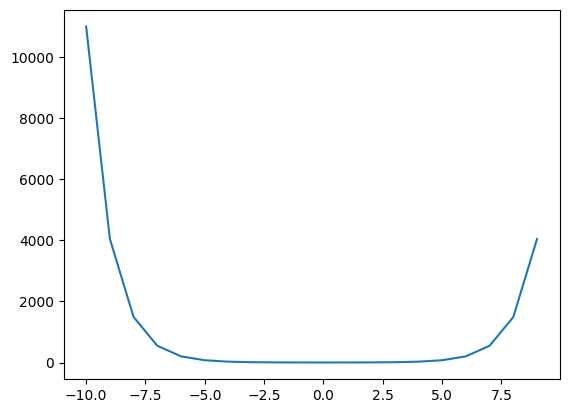

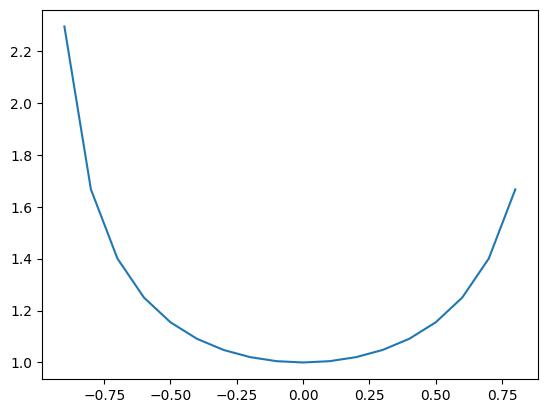

In [32]:
#sampling test
x=np.arange(-10,10,1)
plt.plot(x,np.cosh(x))
plt.show()
u=np.arange(-0.9,0.9,0.1)
plt.plot(u,1/np.sqrt(1-u**2))
plt.show()

## Auto compute of curvature tensors

### Sphere case 2D manifolds

In [33]:
# Define the coordinates for 3D spherical coordinates (r, theta, phi)
theta, phi = sp.symbols('theta phi')

# Define the metric tensor for 3D spherical coordinates
metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = 1
metric[1][1] = sp.sin(theta)**2

# Define the symbols array
symbols = [theta, phi]

# Create a MetricTensor object
m_obj = MetricTensor(metric, symbols)

# Compute Christoffel symbols
ch = ChristoffelSymbols.from_metric(m_obj)

# Compute Riemann Curvature Tensor
riemann = RiemannCurvatureTensor.from_christoffels(ch)

# Compute Ricci Tensor
ricci = RicciTensor.from_riemann(riemann)

# Compute Ricci Scalar
ricci_scalar = RicciScalar.from_riccitensor(ricci)

# Display the results
print("Metric Tensor:")
display(m_obj.tensor())

print("\nChristoffel Symbols:")
display(ch.tensor())

print("\nRiemann Curvature Tensor:")
display(riemann.tensor())

print("\nRicci Tensor:")
display(ricci.tensor())

print("\nRicci Scalar:")
display(ricci_scalar.simplify())

Metric Tensor:


[[1, 0], [0, sin(theta)**2]]


Christoffel Symbols:


[[[0, 0], [0, -sin(theta)*cos(theta)]], [[0, cos(theta)/sin(theta)], [cos(theta)/sin(theta), 0]]]


Riemann Curvature Tensor:


[[[[0, 0], [0, 0]], [[0, sin(theta)**2], [-sin(theta)**2, 0]]], [[[0, -1], [1, 0]], [[0, 0], [0, 0]]]]


Ricci Tensor:


[[1, 0], [0, sin(theta)**2]]


Ricci Scalar:


2

### Alcubierre Warp drive

In [34]:
t,x,y,z = sp.symbols('t x y z')


# Define the functions v(t) and f(x, y, z)
v = sp.Function('v')(t)
f = sp.Function('f')(t, x, y, z)




metric = [[0 for i in range(4)] for i in range(4)]
metric[0][0] = -1 + v**2*f**2
metric[1][1] = 1
metric[0][1] = -v*f
metric[1][0] = -v*f
metric[2][2] = 1
metric[3][3] = 1

# Define the symbols array
symbols = [t,x,y,z]

# Create a MetricTensor object
m_obj = MetricTensor(metric, symbols)

# Compute Christoffel symbols
ch = ChristoffelSymbols.from_metric(m_obj)

# Compute Riemann Curvature Tensor
riemann = RiemannCurvatureTensor.from_christoffels(ch)

# Compute Ricci Tensor
ricci = RicciTensor.from_riemann(riemann)

# Compute Ricci Scalar
ricci_scalar = RicciScalar.from_riccitensor(ricci)

# Display the results
print("Metric Tensor:")
sp.pretty_print(m_obj.tensor())

show_intermediate=False
if show_intermediate:
    print("\nChristoffel Symbols:")
    sp.pretty_print(ch.tensor())
    
    print("\nRiemann Curvature Tensor:")
    sp.pretty_print(riemann.tensor())
    
    print("\nRicci Tensor:")
    sp.pretty_print(ricci.tensor())
    
    print("\nRicci Scalar:")
    sp.pretty_print(ricci_scalar.simplify())





Metric Tensor:
⎡ 2              2                                  ⎤
⎢f (t, x, y, z)⋅v (t) - 1  -f(t, x, y, z)⋅v(t)  0  0⎥
⎢                                                   ⎥
⎢  -f(t, x, y, z)⋅v(t)              1           0  0⎥
⎢                                                   ⎥
⎢           0                       0           1  0⎥
⎢                                                   ⎥
⎣           0                       0           0  1⎦


In [35]:
einst = EinsteinTensor.from_metric(m_obj)

In [36]:
einst.tensor()

[[-(0.5*f(t, x, y, z)**2*v(t)**2 - 0.5)*(2*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), (x, 2)) + 2*v(t)**2*Derivative(f(t, x, y, z), x)**2 + v(t)**2*Derivative(f(t, x, y, z), y)**2/2 + v(t)**2*Derivative(f(t, x, y, z), z)**2/2 + 2*v(t)*Derivative(f(t, x, y, z), t, x) + 2*Derivative(f(t, x, y, z), x)*Derivative(v(t), t)) + f(t, x, y, z)**3*v(t)**4*Derivative(f(t, x, y, z), (x, 2)) + f(t, x, y, z)**2*v(t)**4*Derivative(f(t, x, y, z), x)**2 - f(t, x, y, z)**2*v(t)**4*Derivative(f(t, x, y, z), y)**2/2 - f(t, x, y, z)**2*v(t)**4*Derivative(f(t, x, y, z), z)**2/2 + f(t, x, y, z)**2*v(t)**3*Derivative(f(t, x, y, z), t, x) + f(t, x, y, z)**2*v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(v(t), t) - f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), (x, 2)) - f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), (y, 2)) - f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), (z, 2)) - v(t)**2*Derivative(f(t, x, y, z), x)**2 - v(t)**2*Derivative(f(t, x, y, z), y)**2/2 - v(t)**2*Derivative(f(t, x, y, z), z

In [37]:
sp.latex(einst.tensor()[0][0].simplify())

'\\left(- 0.75 f^{2}{\\left(t,x,y,z \\right)} v^{2}{\\left(t \\right)} \\left(\\frac{\\partial}{\\partial y} f{\\left(t,x,y,z \\right)}\\right)^{2} - 0.75 f^{2}{\\left(t,x,y,z \\right)} v^{2}{\\left(t \\right)} \\left(\\frac{\\partial}{\\partial z} f{\\left(t,x,y,z \\right)}\\right)^{2} - 1.0 f{\\left(t,x,y,z \\right)} \\frac{\\partial^{2}}{\\partial y^{2}} f{\\left(t,x,y,z \\right)} - 1.0 f{\\left(t,x,y,z \\right)} \\frac{\\partial^{2}}{\\partial z^{2}} f{\\left(t,x,y,z \\right)} - 0.25 \\left(\\frac{\\partial}{\\partial y} f{\\left(t,x,y,z \\right)}\\right)^{2} - 0.25 \\left(\\frac{\\partial}{\\partial z} f{\\left(t,x,y,z \\right)}\\right)^{2}\\right) v^{2}{\\left(t \\right)}'

In [38]:
einst.tensor()[0][0].simplify()    #EinsteinTensor give the G_{uv}

(-0.75*f(t, x, y, z)**2*v(t)**2*Derivative(f(t, x, y, z), y)**2 - 0.75*f(t, x, y, z)**2*v(t)**2*Derivative(f(t, x, y, z), z)**2 - 1.0*f(t, x, y, z)*Derivative(f(t, x, y, z), (y, 2)) - 1.0*f(t, x, y, z)*Derivative(f(t, x, y, z), (z, 2)) - 0.25*Derivative(f(t, x, y, z), y)**2 - 0.25*Derivative(f(t, x, y, z), z)**2)*v(t)**2

In [39]:
U= sp.Matrix([1, v * f,0 ,0 ]) #it's U^u, U_u is given by (1,0,0,0)

In [40]:
result = 0
for u in range(4):
    for v in range(4):
        result += U[u] * U[v] * einst[u, v]

In [41]:
#sp.latex(result.simplify())

In [42]:
result.simplify() 

0.25*(-Derivative(f(t, x, y, z), y)**2 - Derivative(f(t, x, y, z), z)**2)*v(t)**2

## Covariant derivative compute

In [43]:

#PARTIAL DERIVATIVES

# Step 1: Define coordinates (t, x, y, z)
t, x, y, z = sp.symbols('t x y z')
symbols = [t, x, y, z]

# Step 2: Define the vector V^v in terms of coordinates
V_0 = sp.Function('V_0')(t, x, y, z)
V_1 = sp.Function('V_1')(t, x, y, z)
V_2 = sp.Function('V_2')(t, x, y, z)
V_3 = sp.Function('V_3')(t, x, y, z)

V = [V_0, V_1, V_2, V_3]

# Step 3: Initialize an empty matrix for partial derivatives
partial_matrix = sp.Matrix.zeros(4, 4)

# Step 4: Compute the partial derivatives for all combinations
for i in range(4):  # iterate over coordinates u^i
    for j in range(4):  # iterate over vector components V^v
        partial_matrix[i, j] = sp.diff(V[j], symbols[i])

display(partial_matrix)




Matrix([
[Derivative(V_0(t, x, y, z), t), Derivative(V_1(t, x, y, z), t), Derivative(V_2(t, x, y, z), t), Derivative(V_3(t, x, y, z), t)],
[Derivative(V_0(t, x, y, z), x), Derivative(V_1(t, x, y, z), x), Derivative(V_2(t, x, y, z), x), Derivative(V_3(t, x, y, z), x)],
[Derivative(V_0(t, x, y, z), y), Derivative(V_1(t, x, y, z), y), Derivative(V_2(t, x, y, z), y), Derivative(V_3(t, x, y, z), y)],
[Derivative(V_0(t, x, y, z), z), Derivative(V_1(t, x, y, z), z), Derivative(V_2(t, x, y, z), z), Derivative(V_3(t, x, y, z), z)]])

In [44]:
# Define the symbols for coordinates and vector components
t, x, y, z = sp.symbols('t x y z')
V_h = sp.symbols('V_h0 V_h1 V_h2 V_h3')  # Vector V_h (covariant components)
V_up_h = sp.symbols('V^h0 V^h1 V^h2 V^h3')  # Vector V^h (contravariant components)

# Define a simple metric (for example, flat spacetime)
eta = sp.diag(-1, 1, 1, 1)  # Minkowski metric (flat spacetime)



# Compute Christoffel Symbols for the given metric
ch_sym = ChristoffelSymbols.from_metric(m_obj)

# Christoffel symbol array (with lower indices)
T_uv_h = ch_sym.tensor()

display(sp.simplify(T_uv_h))


# Initialize matrices A and B
A_uv = sp.zeros(4, 4)  # A_{uv} matrix (4x4)
B_u_v = sp.zeros(4, 4)  # B_u^v matrix (4x4)

# Perform the matrix multiplication for A_uv = T_{uv}^h * V_h
for u in range(4):
    for v in range(4):
        A_uv[u, v] = sum(T_uv_h[h,u,v] * V_h[h] for h in range(4))

# Perform the matrix multiplication for B_u^v = T_{uh}^v * V^h
for u in range(4):
    for v in range(4):
        B_u_v[u, v] = sum(T_uv_h[v,u,h]  * V_up_h[h] for h in range(4))

display(A_uv)
display(B_u_v)

[[[f(t, x, y, z)**2*v(t)**3*Derivative(f(t, x, y, z), x), -f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x), -f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), y)/2, -f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), z)/2], [-f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x), v(t)*Derivative(f(t, x, y, z), x), v(t)*Derivative(f(t, x, y, z), y)/2, v(t)*Derivative(f(t, x, y, z), z)/2], [-f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), y)/2, v(t)*Derivative(f(t, x, y, z), y)/2, 0, 0], [-f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), z)/2, v(t)*Derivative(f(t, x, y, z), z)/2, 0, 0]], [[f(t, x, y, z)**3*v(t)**4*Derivative(f(t, x, y, z), x) - f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x) - f(t, x, y, z)*Derivative(v(t), t) - v(t)*Derivative(f(t, x, y, z), t), -f(t, x, y, z)**2*v(t)**3*Derivative(f(t, x, y, z), x), (-f(t, x, y, z)**2*v(t)**2 - 1)*v(t)*Derivative(f(t, x, y, z), y)/2, (-f(t, x, y, z)**2*v(t)**2 - 1)*v(t)*Derivative(f(t, x, y, z), z)/2], [-f(t, x, y, z)**2*v(t)**3*Derivativ

Matrix([
[V_h0*(-(-2*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x) - 2*f(t, x, y, z)*Derivative(v(t), t) - 2*v(t)*Derivative(f(t, x, y, z), t))*f(t, x, y, z)*v(t)/2 - f(t, x, y, z)**2*v(t)*Derivative(v(t), t) - f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), t)) + V_h1*((-f(t, x, y, z)**2*v(t)**2/2 + 1/2)*(-2*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x) - 2*f(t, x, y, z)*Derivative(v(t), t) - 2*v(t)*Derivative(f(t, x, y, z), t)) - (2*f(t, x, y, z)**2*v(t)*Derivative(v(t), t) + 2*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), t))*f(t, x, y, z)*v(t)/2) - V_h2*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), y) - V_h3*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), z), -V_h0*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x) - V_h1*f(t, x, y, z)**2*v(t)**3*Derivative(f(t, x, y, z), x) + V_h2*v(t)*Derivative(f(t, x, y, z), y)/2 + V_h3*v(t)*Derivative(f(t, x, y, z), z)/2, -V_h0*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), y)/2 + V_h1*(-(-f(t, x, y, z)**2*v(t)**2/2 + 1/2)*v(t)*

Matrix([
[V^h0*(-(-2*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x) - 2*f(t, x, y, z)*Derivative(v(t), t) - 2*v(t)*Derivative(f(t, x, y, z), t))*f(t, x, y, z)*v(t)/2 - f(t, x, y, z)**2*v(t)*Derivative(v(t), t) - f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), t)) - V^h1*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x) - V^h2*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), y)/2 - V^h3*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), z)/2, V^h0*((-f(t, x, y, z)**2*v(t)**2/2 + 1/2)*(-2*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x) - 2*f(t, x, y, z)*Derivative(v(t), t) - 2*v(t)*Derivative(f(t, x, y, z), t)) - (2*f(t, x, y, z)**2*v(t)*Derivative(v(t), t) + 2*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), t))*f(t, x, y, z)*v(t)/2) - V^h1*f(t, x, y, z)**2*v(t)**3*Derivative(f(t, x, y, z), x) + V^h2*(-(-f(t, x, y, z)**2*v(t)**2/2 + 1/2)*v(t)*Derivative(f(t, x, y, z), y) - f(t, x, y, z)**2*v(t)**3*Derivative(f(t, x, y, z), y)) + V^h3*(-(-f(t, x, y, z)**2*v(t)**2/2 + 1/2)*v(t)*Derivat

In [45]:
def christoffel_x_vector(V,metric_einsteinpy,sp_symbols, vector_is_covariant):
    # The given metric must be a einsteinpy object not a tensor!

    dim=len(sp_symbols)

    # Compute Christoffel Symbols for the given metric
    ch_sym = ChristoffelSymbols.from_metric(metric_einsteinpy)
    
    # Christoffel symbol array (with lower indices)
    T_uv_h = ch_sym.tensor()



    if vector_is_covariant:
        # Initialize matrices A and B
        A_uv = sp.zeros(dim, dim)  # A_{uv} matrix (4x4)
        
        # Perform the matrix multiplication for A_uv = T_{uv}^h * V_h
        for u in range(dim):
            for v in range(dim):
                A_uv[u, v] = sum(T_uv_h[h,u,v] * V[h] for h in range(dim)) #first index is the upper index for christoffel symbol


        return A_uv
        
    else:
        # Initialize matrices A and B
        B_u_v = sp.zeros(dim, dim)  # B_u^v matrix (4x4)
        
        
        # Perform the matrix multiplication for B_u^v = T_{uh}^v * V^h
        for u in range(dim):
            for v in range(dim):
                B_u_v[u, v] = sum(T_uv_h[v,u,h]  * V[h] for h in range(dim))

        return B_u_v




In [46]:
def covariant_derivative(V,metric_einsteinpy,sp_symbols, vector_is_covariant):

    dim=len(sp_symbols)

    #Initialize an empty matrix for partial derivatives
    partial_matrix = sp.Matrix.zeros(dim,dim)
    
    #Compute the partial derivatives for all combinations
    for i in range(dim):  # iterate over coordinates u^i
        for j in range(dim):  # iterate over vector components V^v
            partial_matrix[i, j] = sp.diff(V[j], sp_symbols[i])
    

    
    ch_V=christoffel_x_vector(V,metric_einsteinpy,sp_symbols, vector_is_covariant)


    if vector_is_covariant:

        return partial_matrix-ch_V

    else:

        return partial_matrix+ch_V


    
    

In [47]:
# Define the coordinates for 2D polar coordinates (r, theta)
r, theta = sp.symbols('r theta')


metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = 1
metric[1][1] = r**2

# Define the symbols array
symbols = [r, theta]

# Create a MetricTensor object
m_obj = MetricTensor(metric, symbols)



V_test = sp.Matrix([r,theta])

test_contravariant=covariant_derivative(V_test,m_obj,symbols, vector_is_covariant=False)

V_test = sp.Matrix([1,2])

test_covariant=covariant_derivative(V_test,m_obj,symbols, vector_is_covariant=True)


display(test_contravariant)

display(test_covariant)

Matrix([
[       1, theta/r],
[-r*theta,       2]])

Matrix([
[   0, -2/r],
[-2/r,    r]])

## Operating System

### Functions

In [48]:
def get_tetrahed(user_input_metric):
    #The tetrahed is defined as in https://arxiv.org/abs/2404.03095
 
    # Define the scalars A, B, C, and D
    # Define the scalars with adjusted indices
    A = g[9]
    
    B = -g[8]**2 + g[7] * g[9]
    
    C = (-g[4] * g[8]**2 - g[7] * g[6]**2 - g[9] * g[5]**2
         + 2 * g[5] * g[6] * g[8] + g[4] * g[7] * g[9])
    
    
    D = (g[1]**2 * g[8]**2 + g[2]**2 * g[6]**2 + g[3]**2 * g[5]**2
         - g[7] * g[9] * g[1]**2 - g[4] * g[9] * g[2]**2 - g[4] * g[7] * g[3]**2
         - g[0] * g[9] * g[5]**2 - g[0] * g[7] * g[6]**2 - g[0] * g[4] * g[8]**2
         + 2 * g[9] * g[1] * g[2] * g[5] + 2 * g[7] * g[1] * g[3] * g[6]
         + 2 * g[4] * g[2] * g[3] * g[8] + 2 * g[0] * g[5] * g[6] * g[8] 
         - 2 * g[1] * g[2] * g[6] * g[8] - 2 * g[1] * g[3] * g[5] * g[8]
         - 2 * g[2] * g[3] * g[5] * g[6] + g[0] * g[4] * g[7] * g[9])
    
    
    #note : (A,B,C,D) = (-,+,+,+)
    
    E_0 =(1 / sp.sqrt(-C * D)) * sp.Matrix([
        C,   #here, first error of the paper, it's a +C not -C             
         
         g[1] * g[8]**2 + g[2] * g[5] * g[9] + g[3] * g[6] * g[7] - g[1] * g[7] * g[9] - g[2] * g[6] * g[8] - g[3] * g[5] * g[8],
    
        g[2] * g[6]**2 + g[1] * g[5] * g[9] + g[3] * g[4] * g[8] - g[1] * g[6] * g[8] - g[2] * g[4] * g[9] - g[3] * g[5] * g[6],
    
        g[3] * g[5]**2 + g[1] * g[6] * g[7] + g[2] * g[4] * g[8] - g[1] * g[5] * g[8] - g[2] * g[5] * g[6] - g[3] * g[4] * g[7]
    
    ])
    
    E_1=(1 / sp.sqrt(B*C)) * sp.Matrix([
        0,                
         
        B,
    
        #g[5] * g[9] - g[6] * g[8], second error in the paper
        -g[5] * g[9] + g[6] * g[8],
    
        g[5] * g[8] - g[6] * g[7]
    
    ])
    
    E_2=(1 / sp.sqrt(A*B)) * sp.Matrix([
        0,                
         
        0,
    
        A,
    
        -g[8] 
    
    ])
    
    E_3=(1 / sp.sqrt(A)) * sp.Matrix([
        0,                
         
        0,
    
        0,
    
        1
    
    ])
    
    E_solution=matrix = sp.Matrix.hstack(E_0, E_1, E_2, E_3)
    
    
    
    E_0=sp.simplify(E_0.subs(user_input_metric))
    E_1=sp.simplify(E_1.subs(user_input_metric))
    E_2=sp.simplify(E_2.subs(user_input_metric))
    E_3=sp.simplify(E_3.subs(user_input_metric))
    
    E_solution=sp.simplify(E_solution.subs(user_input_metric))

    return E_0, E_1, E_2, E_3, E_solution
        

In [49]:
def Warp_Factory(user_input_metric,symbols):
    RESULTS={}

    #Construct the template on which we are going to substitute user inputs
    metric_symbol = sp.symbols('g1:11')

    metric_template = sp.Matrix([
        [g[0], g[1], g[2], g[3]],
        [g[1], g[4], g[5], g[6]],
        [g[2], g[5], g[7], g[8]],
        [g[3], g[6], g[8], g[9]]
    ])

    

    # Update the template
    Metric = metric_template.subs(user_input_metric)
    
    # Create a MetricTensor object that can be used with einsteinpy
    m_obj = MetricTensor(sp.Array(Metric), symbols)

    #no need to compute the following quantity but they are available at this point
    
    # Compute Christoffel symbols
    #ch = ChristoffelSymbols.from_metric(m_obj)
    
    # Compute Riemann Curvature Tensor
    #riemann = RiemannCurvatureTensor.from_christoffels(ch)
    
    # Compute Ricci Tensor
    #ricci = RicciTensor.from_riemann(riemann)
    
    # Compute Ricci Scalar
    #ricci_scalar = RicciScalar.from_riccitensor(ricci)
    
    # Compute EinsteinTensor
    einst = EinsteinTensor.from_metric(m_obj)
    #we go back to sympy object
    Einstein_tensor=einst.tensor() 
    Tuv=sp.simplify(sp.Matrix(Einstein_tensor)) #mind that the unit are not yet correct

    RESULTS["Metric"]=Metric
    RESULTS["Tuv"]=Tuv

    print("Einstein tensor computed.")#############################################################################


    #Get tetrahed
    E_0, E_1, E_2, E_3, E_solution = get_tetrahed(user_input_metric)

    # The tetrahed corresponding to the local observer whose 4-velocity vector is orthogonal 
    # to constant time hypersurface. 

    print("Tetrahed computed.")####################################################################################
    

    #compute Tu^v^, the energy-momentum tensor from the perspective of a local observer 
    Tuv_ref=sp.simplify((E_solution.T)*Tuv*E_solution)

    RESULTS["Tu^v^"]=Tuv_ref
    
    #NEC ====================================================================
    
    # Define symbolic variables theta and psi
    theta, psi = sp.symbols('theta psi')
    
    # Define the parametric null-vector (1, sin(theta)*cos(psi), sin(theta)*sin(psi), cos(theta)) 
    ku = sp.Matrix([
        1,
        sp.sin(theta) * sp.cos(psi),
        sp.sin(theta) * sp.sin(psi),
        sp.cos(theta)
    ])
    
    NEC=ku.T*Tuv_ref*ku
    NEC=NEC[0,0] #conversion from matrix (1,1) to scalar

    RESULTS["NEC"]=NEC
    
    #WEC ====================================================================
    
    # Define the rapidities
    eta_1, eta_2, eta_3 = sp.symbols('eta_1 eta_2 eta_3')
    
    # Define the hyperbolic functions
    cosh_1, sinh_1 = sp.cosh(eta_1), sp.sinh(eta_1)
    cosh_2, sinh_2 = sp.cosh(eta_2), sp.sinh(eta_2)
    cosh_3, sinh_3 = sp.cosh(eta_3), sp.sinh(eta_3)
    
    # Lorentz boost in the x-direction (eta_1)
    Lambda_1 = sp.Matrix([
        [cosh_1, -sinh_1, 0, 0],
        [-sinh_1, cosh_1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    
    # Lorentz boost in the y-direction (eta_2)
    Lambda_2 = sp.Matrix([
        [cosh_2, 0, -sinh_2, 0],
        [0, 1, 0, 0],
        [-sinh_2, 0, cosh_2, 0],
        [0, 0, 0, 1]
    ])
    
    # Lorentz boost in the z-direction (eta_3)
    Lambda_3 = sp.Matrix([
        [cosh_3, 0, 0, -sinh_3],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [-sinh_3, 0, 0, cosh_3]
    ])
    
    # Define the parametric time-vector
    Uu=sp.Matrix([1,0,0,0])
    Uu=Lambda_1*Lambda_2*Lambda_3*Uu
    
    WEC=Uu.T*Tuv_ref*Uu
    WEC=WEC[0,0]

    RESULTS["WEC"]=WEC
    
    #SEC ====================================================================
    minkowski=sp.Matrix([
        [-1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    
    
    trace_Tuv_ref=-Tuv_ref[0,0]+Tuv_ref[1,1]+Tuv_ref[2,2]+Tuv_ref[3,3]
    
    SEC=Uu.T*(Tuv_ref-0.5*(trace_Tuv_ref)*minkowski)*Uu
    SEC=SEC[0,0]

    RESULTS["SEC"]=SEC
    
    #DEC ====================================================================
    
    minkowski_inv=minkowski
    
    energy_flow=-minkowski_inv*Tuv_ref*Uu

    #the original dominant energy condition
    DEC_intern=energy_flow.T*minkowski*energy_flow
    DEC_intern=DEC_intern[0,0]

    #we define the dominant energy condition as in https://arxiv.org/abs/2404.03095 to make it comparable to other energy conditions
    DEC= -sp.sign(DEC_intern) * sp.sqrt(sp.Abs(DEC_intern))

    RESULTS["DEC"]=DEC
    
    print("Energy conditions computed.")###########################################################################
    

    #note that in this section, the quantities computed are not expressed in the standard units yet

    
    #Momentum ===============================================================
    momentum=Tuv_ref[1:,0]
    
    RESULTS["Momentum"]=momentum
    
    #Metric scalar ==========================================================
    
    #4-velocity vector
    nu=E_0
    
    nu_cov=Metric*nu
    
    Metric_inv=Metric.inv()
    
    h_uv = Metric + (Metric*nu)*(Metric*nu).T
    
    Du_nv=covariant_derivative(nu_cov,m_obj,symbols, vector_is_covariant=True)
    
    Dv_nu=Du_nv.T
    
    expansion_temp=covariant_derivative(nu,m_obj,symbols, vector_is_covariant=False)
    expansion_scalar=sp.simplify(expansion_temp[0,0]+expansion_temp[1,1]+expansion_temp[2,2]+expansion_temp[3,3])

    RESULTS["expansion_scalar"]=expansion_scalar

    
    
    vorticity_uv=(Du_nv-Dv_nu)/2
    
    vorticity_uv_up = Metric_inv * vorticity_uv * Metric_inv
    
    vorticity_scalar = sp.simplify(sp.sqrt(sp.simplify(sum(vorticity_uv[u,v] * vorticity_uv_up[u,v] for u in range(4) for v in range(4)))))
    
    RESULTS["vorticity_scalar"]=vorticity_scalar

    
    
    shear_uv=Dv_nu-expansion_scalar*h_uv/3-vorticity_uv
    
    shear_uv_up = Metric_inv * shear_uv * Metric_inv
    
    shear_scalar = sp.simplify(sp.sqrt(sp.simplify(sum(shear_uv[u,v] * shear_uv_up[u,v] for u in range(4) for v in range(4)))))
    
    RESULTS["shear_scalar"]=expansion_scalar


    
    expansion_uv=shear_uv+expansion_scalar*h_uv/3

    
    print("Metric scalar computed.")###########################################################################


    #Extrinsic Curvature


    #convert metric to 3+1 formalism
    #first we need to establish what alpha beta gamma are in terms of g1,g2,g3,...
    
    # Define the 3+1 variables
    alpha, beta1, beta2, beta3 = sp.symbols('alpha beta1 beta2 beta3')
    gamma11, gamma12, gamma13 = sp.symbols('gamma11 gamma12 gamma13')
    gamma22, gamma23 = sp.symbols('gamma22 gamma23')
    gamma33 = sp.symbols('gamma33')
    
    Gamma=sp.Matrix([
        [gamma11, gamma12, gamma13],
        [gamma12, gamma22, gamma23],
        [gamma13, gamma23, gamma33]
    ])
    
    beta_vector = sp.Matrix([beta1, beta2, beta3])
    
    
    # Compute the covariant components beta_i
    beta_covariant = sp.simplify(Gamma.inv()) * beta_vector
    
    # Compute beta^i * beta_i
    beta_dot_beta = sp.simplify(beta_vector.dot(beta_covariant))
    
    
    
    # Those several substitutions allow to obtain alpha beta gamma are in terms of g1,g2,g3,...
    substitution_step1= {
        beta1:g[1],
        beta2:g[2],
        beta3:g[3],
        gamma11:g[4],
        gamma12:g[5],
        gamma13:g[6],
        gamma22:g[7],
        gamma23:g[8],
        gamma33:g[9]
    }
    
    substitution_step2= {
        alpha:sp.sqrt(-g[0]+beta_dot_beta.subs(substitution_step1))
    }
    
    substitution_3_1_form= substitution_step1 | substitution_step2
    
    
    
    #compute Kij and its scalar
    symbols_3=symbols[1:] #we take only spatial coordinate into accounts to compute Kij
    
    
    metric_3=Gamma.subs(substitution_3_1_form).subs(user_input_metric)
    metric_3_einsteinpy = MetricTensor(sp.Array(metric_3), symbols_3)
    
    DiBj=covariant_derivative(beta_vector.subs(substitution_3_1_form).subs(user_input_metric),metric_3_einsteinpy,symbols_3, vector_is_covariant=True)
    
    #Kij=(1/2α) * (∇ i βj + ∇ j βi - ∂/∂t γij )
    Kij=sp.simplify(1/(2*alpha.subs(substitution_3_1_form).subs(user_input_metric))*(DiBj+DiBj.T-sp.diff(metric_3,symbols[0])))
    
    K=sp.simplify(-alpha.subs(substitution_3_1_form).subs(user_input_metric)*sum(metric_3.inv()[i,j]* Kij[i,j] for i in range(3) for j in range(3)))


    RESULTS["alpha"]=sp.simplify(alpha.subs(substitution_3_1_form))
    RESULTS["beta1"]=beta1.subs(substitution_3_1_form)
    RESULTS["beta2"]=beta1.subs(substitution_3_1_form)
    RESULTS["beta3"]=beta1.subs(substitution_3_1_form)
    RESULTS["beta_beta^"]=beta_dot_beta.subs(substitution_3_1_form)
    RESULTS["Gamma"]=Gamma.subs(substitution_3_1_form)

    RESULTS["K"]=K
    
    

    print("Extrinsic curvature computed.")###########################################################################

    return RESULTS
        

In [50]:
    #Numerical Evaluation


    #to display
    
    #beta1,2,3 [unit = 1]
    #gamma matrix [unit = 1]
    #alpha [unit = 1]
    #T^^ for n0 (conversion needed) [unit = J m^-3]
    #T^^ for minimum values among all observer (conversion needed) [unit = J m^-3]
    #stress scalar (might be the same as expansion scalar) [unit = J m^-3]
    #shear scalar [unit = m^-1]
    #vorticity scalar [unit = m^-1]
    #K scalar [unit = m^-1]
    #Momentum flow (conversion needed with extra /c to go back to momentum)  [unit = kg m s^-1 m^-3]
    #expansion scalar [unit = m^-1]
    #NEC (conversion needed) [unit = J m^-3]
    #WEC (conversion needed) [unit = J m^-3]
    #SEC (conversion needed) [unit = J m^-3]
    #DEC (conversion needed) [unit = J m^-3]
    
    
    
    gravity_const=6.6743*1e-11
    c_speed_const=299792458
    pi_8=8*np.pi
    physical_energy_conversion=c_speed_const**4/pi_8/gravity_const
    physical_momentum_conversion=physical_energy_conversion/c_speed_const

    #additional notes:
    #   time must be given in distance (thus multiply by c).
    #   R = 1/m^2
    #   g=1
    #   Tuv = c^4/8piG = J/m^3
    


   

    

### Workflow 2

In [51]:
##################################################### USER INPUT ########################################################


# Define substitutions for the new variables

t,x,y,z = sp.symbols('t x y z')
symbols = [t,x,y,z] #IMPORTANT first symbol must be time

# Define the functions to be input in the metric
v = sp.Function('v')(t)
f = sp.Function('f')(t, x, y, z)



#user input metric using symbol
user_input_metric = {
    g[0]: -1 + v**2*f**2,
    g[1]: -v*f,
    g[2]: 0,
    g[3]: 0,
    g[4]: 1,
    g[5]: 0,
    g[6]: 0,
    g[7]: 1,
    g[8]: 0,
    g[9]: 1   
}

##########################################################################################################################


RESULTS_warp_factory=Warp_Factory(user_input_metric,symbols)

Einstein tensor computed.
Tetrahed computed.
Energy conditions computed.
Metric scalar computed.
Extrinsic curvature computed.


In [52]:
display(RESULTS_warp_factory["WEC"])

RESULTS_warp_factory["WEC"].free_symbols

RESULTS_warp_factory["WEC"].atoms(sp.Function)

-(-(f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, y)/2 + v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(f(t, x, y, z), y) + v(t)*Derivative(f(t, x, y, z), t, y)/2 + Derivative(f(t, x, y, z), y)*Derivative(v(t), t)/2)*sinh(eta_1)*cosh(eta_2)*cosh(eta_3) - (-1.0*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), (x, 2)) - 1.0*v(t)**2*Derivative(f(t, x, y, z), x)**2 + 0.25*v(t)**2*Derivative(f(t, x, y, z), y)**2 - 0.25*v(t)**2*Derivative(f(t, x, y, z), z)**2 - 1.0*v(t)*Derivative(f(t, x, y, z), t, x) - 1.0*Derivative(f(t, x, y, z), x)*Derivative(v(t), t))*sinh(eta_2)*cosh(eta_3) - v(t)**2*sinh(eta_3)*Derivative(f(t, x, y, z), y)*Derivative(f(t, x, y, z), z)/2 - v(t)*cosh(eta_1)*cosh(eta_2)*cosh(eta_3)*Derivative(f(t, x, y, z), x, y)/2)*sinh(eta_2)*cosh(eta_3) - (-(f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, z)/2 + v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(f(t, x, y, z), z) + v(t)*Derivative(f(t, x, y, z), t, z)/2 + Derivative(f(t, x, y, z), z)*Derivative(v(t), t)/2)*sinh(e

{cosh(eta_1),
 cosh(eta_2),
 cosh(eta_3),
 f(t, x, y, z),
 sinh(eta_1),
 sinh(eta_2),
 sinh(eta_3),
 v(t)}

In [53]:
    #Numerical Evaluation


    #to display
    
    #beta1,2,3 [unit = 1]
    #gamma matrix [unit = 1]
    #alpha [unit = 1]
    #T^^ for n0 (conversion needed) [unit = J m^-3]
    #T^^ for minimum values among all observer (conversion needed) [unit = J m^-3]
    #stress scalar (might be the same as expansion scalar) [unit = J m^-3]
    #shear scalar [unit = m^-1]
    #vorticity scalar [unit = m^-1]
    #K scalar [unit = m^-1]
    #Momentum flow (conversion needed with extra /c to go back to momentum)  [unit = kg m s^-1 m^-3]
    #expansion scalar [unit = m^-1]
    #NEC (conversion needed) [unit = J m^-3]
    #WEC (conversion needed) [unit = J m^-3]
    #SEC (conversion needed) [unit = J m^-3]
    #DEC (conversion needed) [unit = J m^-3]
    
    
    
    gravity_const=6.6743*1e-11
    c_speed_const=299792458
    pi_8=8*np.pi
    physical_energy_conversion=c_speed_const**4/pi_8/gravity_const
    physical_momentum_conversion=physical_energy_conversion/c_speed_const

    #additional notes:
    #   time must be given in distance (thus multiply by c).
    #   R = 1/m^2
    #   g=1
    #   Tuv = c^4/8piG = J/m^3
    


### Workflow

In [54]:
##################################################### START ##############################################################
metric_symbol = sp.symbols('g1:11')

metric_template = sp.Matrix([
    [g[0], g[1], g[2], g[3]],
    [g[1], g[4], g[5], g[6]],
    [g[2], g[5], g[7], g[8]],
    [g[3], g[6], g[8], g[9]]
])

##################################################### USER INPUT ########################################################


# Define substitutions for the new variables

t,x,y,z = sp.symbols('t x y z')
symbols = [t,x,y,z] #IMPORTANT first symbol must be time

# Define the functions to be input in the metric
v = sp.Function('v')(t)
f = sp.Function('f')(t, x, y, z)



#user input metric using symbol
user_input_metric = {
    g[0]: -1 + v**2*f**2,
    g[1]: -v*f,
    g[2]: 0,
    g[3]: 0,
    g[4]: 1,
    g[5]: 0,
    g[6]: 0,
    g[7]: 1,
    g[8]: 0,
    g[9]: 1   
}

##########################################################################################################################





In [55]:
# Update the original matrix G
Metric = metric_template.subs(user_input_metric)

# Create a MetricTensor object
m_obj = MetricTensor(sp.Array(Metric), symbols)

# Compute Christoffel symbols
#ch = ChristoffelSymbols.from_metric(m_obj)

# Compute Riemann Curvature Tensor
#riemann = RiemannCurvatureTensor.from_christoffels(ch)

# Compute Ricci Tensor
#ricci = RicciTensor.from_riemann(riemann)

# Compute Ricci Scalar
#ricci_scalar = RicciScalar.from_riccitensor(ricci)

# Compute EinsteinTensor
einst = EinsteinTensor.from_metric(m_obj)
Einstein_tensor=einst.tensor()


Tuv=sp.simplify(sp.Matrix(Einstein_tensor))

In [56]:
#tetrahed computation

# Define the scalars A, B, C, and D
# Define the scalars with adjusted indices
A = g[9]

B = -g[8]**2 + g[7] * g[9]

C = (-g[4] * g[8]**2 - g[7] * g[6]**2 - g[9] * g[5]**2
     + 2 * g[5] * g[6] * g[8] + g[4] * g[7] * g[9])


D = (g[1]**2 * g[8]**2 + g[2]**2 * g[6]**2 + g[3]**2 * g[5]**2
     - g[7] * g[9] * g[1]**2 - g[4] * g[9] * g[2]**2 - g[4] * g[7] * g[3]**2
     - g[0] * g[9] * g[5]**2 - g[0] * g[7] * g[6]**2 - g[0] * g[4] * g[8]**2
     + 2 * g[9] * g[1] * g[2] * g[5] + 2 * g[7] * g[1] * g[3] * g[6]
     + 2 * g[4] * g[2] * g[3] * g[8] + 2 * g[0] * g[5] * g[6] * g[8] 
     - 2 * g[1] * g[2] * g[6] * g[8] - 2 * g[1] * g[3] * g[5] * g[8]
     - 2 * g[2] * g[3] * g[5] * g[6] + g[0] * g[4] * g[7] * g[9])


#note : (A,B,C,D) = (-,+,+,+)

E_0 =(1 / sp.sqrt(-C * D)) * sp.Matrix([
    C,   #here, first error of the paper, it's a +C not -C             
     
     g[1] * g[8]**2 + g[2] * g[5] * g[9] + g[3] * g[6] * g[7] - g[1] * g[7] * g[9] - g[2] * g[6] * g[8] - g[3] * g[5] * g[8],

    g[2] * g[6]**2 + g[1] * g[5] * g[9] + g[3] * g[4] * g[8] - g[1] * g[6] * g[8] - g[2] * g[4] * g[9] - g[3] * g[5] * g[6],

    g[3] * g[5]**2 + g[1] * g[6] * g[7] + g[2] * g[4] * g[8] - g[1] * g[5] * g[8] - g[2] * g[5] * g[6] - g[3] * g[4] * g[7]

])



E_1=(1 / sp.sqrt(B*C)) * sp.Matrix([
    0,                
     
    B,

    #g[5] * g[9] - g[6] * g[8], second error in the paper
    -g[5] * g[9] + g[6] * g[8],

    g[5] * g[8] - g[6] * g[7]

])

E_2=(1 / sp.sqrt(A*B)) * sp.Matrix([
    0,                
     
    0,

    A,

    -g[8] 

])

E_3=(1 / sp.sqrt(A)) * sp.Matrix([
    0,                
     
    0,

    0,

    1

])

E_solution=matrix = sp.Matrix.hstack(E_0, E_1, E_2, E_3)



E_0=E_0.subs(user_input_metric)
E_1=E_1.subs(user_input_metric)
E_2=E_2.subs(user_input_metric)
E_3=E_3.subs(user_input_metric)

E_solution=E_solution.subs(user_input_metric)

In [57]:
Tuv_ref=sp.simplify((E_solution.T)*Tuv*E_solution)

#NEC

# Define symbolic variables theta and psi
theta, psi = sp.symbols('theta psi')

# Define the vector (1, sin(theta)*cos(psi), sin(theta)*sin(psi), cos(theta))
ku = sp.Matrix([
    1,
    sp.sin(theta) * sp.cos(psi),
    sp.sin(theta) * sp.sin(psi),
    sp.cos(theta)
])

NEC=ku.T*Tuv_ref*ku
NEC=NEC[0,0] #conversion from matrix (1,1) to scalar

#WEC

# Define the rapidities
eta_1, eta_2, eta_3 = sp.symbols('eta_1 eta_2 eta_3')

# Define the hyperbolic functions
cosh_1, sinh_1 = sp.cosh(eta_1), sp.sinh(eta_1)
cosh_2, sinh_2 = sp.cosh(eta_2), sp.sinh(eta_2)
cosh_3, sinh_3 = sp.cosh(eta_3), sp.sinh(eta_3)

# Lorentz boost in the x-direction (eta_1)
Lambda_1 = sp.Matrix([
    [cosh_1, -sinh_1, 0, 0],
    [-sinh_1, cosh_1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Lorentz boost in the y-direction (eta_2)
Lambda_2 = sp.Matrix([
    [cosh_2, 0, -sinh_2, 0],
    [0, 1, 0, 0],
    [-sinh_2, 0, cosh_2, 0],
    [0, 0, 0, 1]
])

# Lorentz boost in the z-direction (eta_3)
Lambda_3 = sp.Matrix([
    [cosh_3, 0, 0, -sinh_3],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [-sinh_3, 0, 0, cosh_3]
])


Uu=sp.Matrix([1,0,0,0])
Uu=Lambda_1*Lambda_2*Lambda_3*Uu

WEC=Uu.T*Tuv_ref*Uu
WEC=WEC[0,0]

#SEC
minkowski=sp.Matrix([
    [-1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])


trace_Tuv_ref=-Tuv_ref[0,0]+Tuv_ref[1,1]+Tuv_ref[2,2]+Tuv_ref[3,3]

SEC=Uu.T*(Tuv_ref-0.5*(trace_Tuv_ref)*minkowski)*Uu
SEC=SEC[0,0]

#DEC

minkowski_inv=minkowski

energy_flow=-minkowski_inv*Tuv_ref*Uu

DEC_intern=energy_flow.T*minkowski*energy_flow
DEC_intern=DEC_intern[0,0]

DEC= -sp.sign(DEC_intern) * sp.sqrt(sp.Abs(DEC_intern))




In [58]:
display(NEC)
display(WEC)
display(SEC)
display(DEC)

0.25*(-Derivative(f(t, x, y, z), y)**2 - Derivative(f(t, x, y, z), z)**2)*v(t)**2 + 0.5*(Derivative(f(t, x, y, z), (y, 2)) + Derivative(f(t, x, y, z), (z, 2)))*v(t)*sin(theta)*cos(psi) + ((f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, y)/2 + v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(f(t, x, y, z), y) + v(t)*Derivative(f(t, x, y, z), t, y)/2 + Derivative(f(t, x, y, z), y)*Derivative(v(t), t)/2)*sin(theta)*cos(psi) + (-1.0*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), (x, 2)) - 1.0*v(t)**2*Derivative(f(t, x, y, z), x)**2 + 0.25*v(t)**2*Derivative(f(t, x, y, z), y)**2 - 0.25*v(t)**2*Derivative(f(t, x, y, z), z)**2 - 1.0*v(t)*Derivative(f(t, x, y, z), t, x) - 1.0*Derivative(f(t, x, y, z), x)*Derivative(v(t), t))*sin(psi)*sin(theta) + v(t)**2*cos(theta)*Derivative(f(t, x, y, z), y)*Derivative(f(t, x, y, z), z)/2 - v(t)*Derivative(f(t, x, y, z), x, y)/2)*sin(psi)*sin(theta) + ((f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, z)/2 + v(t)**2*Derivative(f(t, x, y, z), x)*Derivat

-(-(f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, y)/2 + v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(f(t, x, y, z), y) + v(t)*Derivative(f(t, x, y, z), t, y)/2 + Derivative(f(t, x, y, z), y)*Derivative(v(t), t)/2)*sinh(eta_1)*cosh(eta_2)*cosh(eta_3) - (-1.0*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), (x, 2)) - 1.0*v(t)**2*Derivative(f(t, x, y, z), x)**2 + 0.25*v(t)**2*Derivative(f(t, x, y, z), y)**2 - 0.25*v(t)**2*Derivative(f(t, x, y, z), z)**2 - 1.0*v(t)*Derivative(f(t, x, y, z), t, x) - 1.0*Derivative(f(t, x, y, z), x)*Derivative(v(t), t))*sinh(eta_2)*cosh(eta_3) - v(t)**2*sinh(eta_3)*Derivative(f(t, x, y, z), y)*Derivative(f(t, x, y, z), z)/2 - v(t)*cosh(eta_1)*cosh(eta_2)*cosh(eta_3)*Derivative(f(t, x, y, z), x, y)/2)*sinh(eta_2)*cosh(eta_3) - (-(f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, z)/2 + v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(f(t, x, y, z), z) + v(t)*Derivative(f(t, x, y, z), t, z)/2 + Derivative(f(t, x, y, z), z)*Derivative(v(t), t)/2)*sinh(e

-(-(-0.25*(-Derivative(f(t, x, y, z), y)**2 - Derivative(f(t, x, y, z), z)**2)*v(t)**2 - 0.25*v(t)**2*Derivative(f(t, x, y, z), y)**2 + 0.25*v(t)**2*Derivative(f(t, x, y, z), z)**2)*sinh(eta_3) - (f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, z)/2 + v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(f(t, x, y, z), z) + v(t)*Derivative(f(t, x, y, z), t, z)/2 + Derivative(f(t, x, y, z), z)*Derivative(v(t), t)/2)*sinh(eta_1)*cosh(eta_2)*cosh(eta_3) - v(t)**2*sinh(eta_2)*cosh(eta_3)*Derivative(f(t, x, y, z), y)*Derivative(f(t, x, y, z), z)/2 - v(t)*cosh(eta_1)*cosh(eta_2)*cosh(eta_3)*Derivative(f(t, x, y, z), x, z)/2)*sinh(eta_3) - (-(-0.25*(-Derivative(f(t, x, y, z), y)**2 - Derivative(f(t, x, y, z), z)**2)*v(t)**2 + 0.25*v(t)**2*Derivative(f(t, x, y, z), y)**2 - 0.25*v(t)**2*Derivative(f(t, x, y, z), z)**2)*sinh(eta_2)*cosh(eta_3) - (f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, y)/2 + v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(f(t, x, y, z), y) + v(t)*Derivative(f(t, x, y, z

-sqrt(Abs((-(-f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, y)/2 - v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(f(t, x, y, z), y) - v(t)*Derivative(f(t, x, y, z), t, y)/2 - Derivative(f(t, x, y, z), y)*Derivative(v(t), t)/2)*sinh(eta_1)*cosh(eta_2)*cosh(eta_3) - (1.0*f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), (x, 2)) + 1.0*v(t)**2*Derivative(f(t, x, y, z), x)**2 - 0.25*v(t)**2*Derivative(f(t, x, y, z), y)**2 + 0.25*v(t)**2*Derivative(f(t, x, y, z), z)**2 + 1.0*v(t)*Derivative(f(t, x, y, z), t, x) + 1.0*Derivative(f(t, x, y, z), x)*Derivative(v(t), t))*sinh(eta_2)*cosh(eta_3) + v(t)**2*sinh(eta_3)*Derivative(f(t, x, y, z), y)*Derivative(f(t, x, y, z), z)/2 + v(t)*cosh(eta_1)*cosh(eta_2)*cosh(eta_3)*Derivative(f(t, x, y, z), x, y)/2)**2 + (-(-f(t, x, y, z)*v(t)**2*Derivative(f(t, x, y, z), x, z)/2 - v(t)**2*Derivative(f(t, x, y, z), x)*Derivative(f(t, x, y, z), z) - v(t)*Derivative(f(t, x, y, z), t, z)/2 - Derivative(f(t, x, y, z), z)*Derivative(v(t), t)/2)*sinh(eta_1)*cosh(

In [59]:
#Momentum 

momentum=Tuv_ref[1:,0]


#Metric scalar

#4-velocity vector
nu=E_0

nu_cov=Metric*nu

Metric_inv=Metric.inv()

h_uv = Metric + (Metric*nu)*(Metric*nu).T

Du_nv=covariant_derivative(nu_cov,m_obj,symbols, vector_is_covariant=True)

Dv_nu=Du_nv.T

stress_temp=covariant_derivative(nu,m_obj,symbols, vector_is_covariant=False)
stress_scalar=sp.simplify(stress_temp[0,0]+stress_temp[1,1]+stress_temp[2,2]+stress_temp[3,3])

#test=Metric.inv()*Du_nv
#display(sp.simplify(test[0,0]+test[1,1]+test[2,2]+test[3,3]))  == stress_scalar

vorticity_uv=(Du_nv-Dv_nu)/2

vorticity_uv_up = Metric_inv * vorticity_uv * Metric_inv

vorticity_scalar = sp.simplify(sp.sqrt(sp.simplify(sum(vorticity_uv[u,v] * vorticity_uv_up[u,v] for u in range(4) for v in range(4)))))



shear_uv=Dv_nu-stress_scalar*h_uv/3-vorticity_uv

shear_uv_up = Metric_inv * shear_uv * Metric_inv

shear_scalar = sp.simplify(sp.sqrt(sp.simplify(sum(shear_uv[u,v] * shear_uv_up[u,v] for u in range(4) for v in range(4)))))


stress_uv=shear_uv+stress_scalar*h_uv/3




In [60]:
#Extrinsic Curvature


#convert metric to 3+1 formalism
#first we need to establish what alpha beta gamma are in terms of g1,g2,g3,...

# Define the 3+1 variables
alpha, beta1, beta2, beta3 = sp.symbols('alpha beta1 beta2 beta3')
gamma11, gamma12, gamma13 = sp.symbols('gamma11 gamma12 gamma13')
gamma22, gamma23 = sp.symbols('gamma22 gamma23')
gamma33 = sp.symbols('gamma33')

Gamma=sp.Matrix([
    [gamma11, gamma12, gamma13],
    [gamma12, gamma22, gamma23],
    [gamma13, gamma23, gamma33]
])

beta_vector = sp.Matrix([beta1, beta2, beta3])


# Compute the covariant components beta_i
beta_covariant = sp.simplify(Gamma.inv()) * beta_vector

# Compute beta^i * beta_i
beta_dot_beta = sp.simplify(beta_vector.dot(beta_covariant))




substitution_step1= {
    beta1:g[1],
    beta2:g[2],
    beta3:g[3],
    gamma11:g[4],
    gamma12:g[5],
    gamma13:g[6],
    gamma22:g[7],
    gamma23:g[8],
    gamma33:g[9]
}

substitution_step2= {
    alpha:sp.sqrt(-g[0]+beta_dot_beta.subs(substitution_step1))
}

substitution_3_1_form= substitution_step1 | substitution_step2



#compute Kij and its scalar
symbols_3=symbols[1:]


metric_3=Gamma.subs(substitution_3_1_form).subs(user_input_metric)
metric_3_einsteinpy = MetricTensor(sp.Array(metric_3), symbols_3)

DiBj=covariant_derivative(beta_vector.subs(substitution_3_1_form).subs(user_input_metric),metric_3_einsteinpy,symbols_3, vector_is_covariant=True)


Kij=sp.simplify(1/(2*alpha.subs(substitution_3_1_form).subs(user_input_metric))*(DiBj+DiBj.T-sp.diff(metric_3,symbols[0])))

K=sp.simplify(-alpha.subs(substitution_3_1_form).subs(user_input_metric)*sum(metric_3.inv()[i,j]* Kij[i,j] for i in range(3) for j in range(3)))


In [61]:
#Numerical Evaluation


#to display

#beta1,2,3 [unit = 1]
#gamma matrix [unit = 1]
#alpha [unit = 1]
#T^^ for n0 (conversion needed) [unit = J m^-3]
#T^^ for minimum values among all observer (conversion needed) [unit = J m^-3]
#stress scalar (might be the same as expansion scalar) [unit = J m^-3]
#shear scalar [unit = m^-1]
#vorticity scalar [unit = m^-1]
#K scalar [unit = m^-1]
#Momentum flow (conversion needed with extra /c to go back to momentum)  [unit = kg m s^-1 m^-3]
#expansion scalar [unit = m^-1]
#NEC (conversion needed) [unit = J m^-3]
#WEC (conversion needed) [unit = J m^-3]
#SEC (conversion needed) [unit = J m^-3]
#DEC (conversion needed) [unit = J m^-3]



gravity_const=6.6743*1e-11
c_speed_const=299792458
pi_8=8*np.pi
physical_energy_conversion=c_speed_const**4/pi_8/gravity_const
physical_momentum_conversion=physical_energy_conversion/c_speed_const


#additional notes:
#   time must be given in distance (thus multiply by c).
#   R = 1/m^2
#   g=1
#   Tuv = c^4/8piG = J/m^3

